In [2]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer

C:\Users\hilal\anaconda3\envs\pytorch\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
twitter_file = "C:/Users/hilal/OneDrive/Belgeler/NLP/Tweets.csv"
df = pd.read_csv(twitter_file).dropna()
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [6]:
cat_id = {'neutral': 1, 
          'negative': 0, 
          'positive': 2}

df['class'] = df['sentiment'].map(cat_id)

In [7]:
df.head(10)

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,1
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2
7,50e14c0bb8,Soooo high,Soooo high,neutral,1
8,e050245fbd,Both of you,Both of you,neutral,1
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,2


In [8]:
BATCH_SIZE = 128
NUM_EPOCHS = 80
MAX_FEATURES = 10

In [9]:
emb_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\hilal\anaconda3\envs\pytorch\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hilal\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/591 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
sentences = [ "Each sentence is converted"]
embeddings = emb_model.encode(sentences)

In [11]:
print(embeddings)

[[ 4.00136858e-02  8.55441764e-03 -1.88630596e-02  6.02709502e-02
   5.72782718e-02  2.99501363e-02  1.63761619e-02  2.14604791e-02
  -7.47054890e-02 -4.09458056e-02 -2.51449086e-02  6.38353974e-02
   3.50896316e-03 -7.41744041e-03 -3.71665135e-02 -7.38465115e-02
   6.45619109e-02 -1.91149153e-02 -5.34372367e-02  3.57454121e-02
   5.72718866e-03  5.18304557e-02 -1.57416426e-02 -2.32236385e-02
   2.33237762e-02  3.31329112e-03  2.31329091e-02 -8.86385620e-04
  -1.22447256e-02 -1.66127402e-02 -6.83541596e-02 -2.93662027e-02
  -2.73816008e-02  1.51105179e-02  7.84564691e-10  4.13988670e-03
  -3.79157513e-02 -5.54059669e-02 -1.82934888e-02  5.50112240e-02
   2.24507060e-02 -1.36461137e-02  6.55120797e-03  1.13984291e-02
  -5.76264895e-02  9.54154134e-03  3.10417004e-02 -1.10082943e-02
   4.96229902e-02  8.32017437e-02 -3.30031514e-02 -6.62362054e-02
  -1.08050779e-02 -7.94921257e-03  2.56415606e-02  5.53592166e-04
  -2.81873159e-02 -7.50432350e-03 -2.05745474e-02  6.62299320e-02
  -3.39717

In [12]:
print(embeddings.squeeze().shape)

(768,)


In [13]:
X = emb_model.encode(df['text'].values)

In [19]:
with open("C:/Users/hilal/OneDrive/Belgeler/NLP/Tweets.csv", "rb") as input_file:
    X = pickle.load(input_file)

In [20]:
y = df['class'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

In [22]:
class SentimentData(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).type(torch.LongTensor)
        self.len = len(self.X)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [23]:
train_ds = SentimentData(X= X_train, y = y_train)
test_ds = SentimentData(X_test, y_test)

In [24]:
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=15000)

In [25]:
class SentimentModel(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN = 10):
        super().__init__()
        self.linear = nn.Linear(NUM_FEATURES, HIDDEN)
        self.linear2 = nn.Linear(HIDDEN, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x

In [26]:
model = SentimentModel(NUM_FEATURES = X_train.shape[1], NUM_CLASSES = 3)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

In [28]:
train_losses = []
for e in range(NUM_EPOCHS):
    curr_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_log = model(X_batch)
        loss = criterion(y_pred_log, y_batch.long())
        
        curr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(curr_loss)
    print(f"Epoch {e}, Loss: {curr_loss}")

Epoch 0, Loss: 110.80382055044174
Epoch 1, Loss: 91.55605208873749
Epoch 2, Loss: 81.71985518932343
Epoch 3, Loss: 77.97978407144547
Epoch 4, Loss: 76.0988883972168
Epoch 5, Loss: 74.79184007644653
Epoch 6, Loss: 73.85478407144547
Epoch 7, Loss: 73.10283815860748
Epoch 8, Loss: 72.48034757375717
Epoch 9, Loss: 71.91091549396515
Epoch 10, Loss: 71.44183695316315
Epoch 11, Loss: 70.88307642936707
Epoch 12, Loss: 70.45466515421867
Epoch 13, Loss: 70.14799293875694
Epoch 14, Loss: 69.83221393823624
Epoch 15, Loss: 69.39829313755035
Epoch 16, Loss: 69.19498133659363
Epoch 17, Loss: 68.8994157910347
Epoch 18, Loss: 68.450164437294
Epoch 19, Loss: 68.09627881646156
Epoch 20, Loss: 67.89210516214371
Epoch 21, Loss: 67.60527640581131
Epoch 22, Loss: 67.26390215754509
Epoch 23, Loss: 67.10875135660172
Epoch 24, Loss: 66.78138250112534
Epoch 25, Loss: 66.58845481276512
Epoch 26, Loss: 66.28361040353775
Epoch 27, Loss: 66.06096342206001
Epoch 28, Loss: 66.03428518772125
Epoch 29, Loss: 65.66656470

<Axes: >

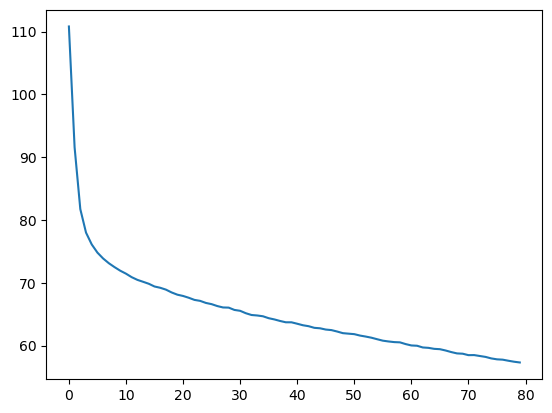

In [29]:
sns.lineplot(x=list(range(len(train_losses))), y= train_losses)

In [30]:
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_test_pred_log = model(X_batch)
        y_test_pred = torch.argmax(y_test_pred_log, dim = 1)

In [31]:
y_test_pred_np = y_test_pred.squeeze().cpu().numpy()

In [32]:
acc = accuracy_score(y_pred=y_test_pred_np, y_true = y_test)
f"The accuracy of the model is {np.round(acc, 3)*100}%."

'The accuracy of the model is 68.0%.'

In [33]:
most_common_cnt = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier: {np.round(most_common_cnt / len(y_test) * 100, 1)} %") # En yaygın sınıf

Naive Classifier: 41.0 %
